<a href="https://colab.research.google.com/github/Kozhedu/Statistics--Python/blob/main/%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5_%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

# Задание 1. Загрузка данных

Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [2]:
df = pd.read_csv("horse_data.csv", na_values='?')

In [3]:
df.head(2)

,2,1,530101,38.50,66,28,3,3.1,?,2.1,...,45.00,8.40,?.4,?.5,2.2,2.3,11300,00000,00000.1,2.4
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1


In [4]:
df.columns = ['surgery', 'Age', 'Hospital Number', 'rectal_temperature', 'pulse', 'respiratory_rate', 
              'temp_of_extr', 'peripheral pulse', 'mucous membranes', 'capillary refill time', 
             'pain','peristalsis', 'abdominal distension', 'nasogastric tube', 'nasogastric reflux', 
             'nasogastric reflux PH', 'rectal examination - feces', 'abdomen', 'packed cell volume', 'total protein', 
             'abdominocentesis appearance', 'abdomcentesis total protein', 'outcome', 'surgical lesion?', 'type of lesion1', 
             'type of lesion2', 'type of lesion3', 'cp_data']

In [5]:
df.head(2)

,surgery,Age,Hospital Number,rectal_temperature,pulse,respiratory_rate,temp_of_extr,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,type of lesion1,type of lesion2,type of lesion3,cp_data
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1


In [6]:
df_r = df[['surgery', 'Age', 'rectal_temperature', 'pulse', 'respiratory_rate','temp_of_extr','pain','outcome']]
df_r.head(2)

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temp_of_extr,pain,outcome
0,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
1,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0


In [7]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   surgery             298 non-null    float64
 1   Age                 299 non-null    int64  
 2   rectal_temperature  239 non-null    float64
 3   pulse               275 non-null    float64
 4   respiratory_rate    241 non-null    float64
 5   temp_of_extr        243 non-null    float64
 6   pain                244 non-null    float64
 7   outcome             298 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.8 KB


# Задание 2. Первичное изучение данных

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [8]:
df_r.describe(include = 'all', percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,95%,99%,max
surgery,298.0,1.395973,0.489881,1.0,1.000,1.0,1.0,1.0,1.0,2.0,2.0,2.000,2.0
Age,299.0,1.642140,2.177300,1.0,1.000,1.0,1.0,1.0,1.0,1.0,9.0,9.000,9.0
rectal_temperature,239.0,38.166527,0.733508,35.4,36.214,37.1,37.3,37.8,38.2,38.5,39.4,40.186,40.8
pulse,275.0,71.934545,28.680522,30.0,36.000,40.0,42.0,48.0,64.0,88.0,125.2,152.600,184.0
respiratory_rate,241.0,30.427386,17.678256,8.0,9.400,12.0,12.0,18.0,24.0,36.0,70.0,90.000,96.0
temp_of_extr,243.0,2.345679,1.046369,1.0,1.000,1.0,1.0,1.0,3.0,3.0,4.0,4.000,4.0
pain,244.0,2.942623,1.303993,1.0,1.000,1.0,1.0,2.0,3.0,4.0,5.0,5.000,5.0
outcome,298.0,1.550336,0.737967,1.0,1.000,1.0,1.0,1.0,1.0,2.0,3.0,3.000,3.0


In [9]:
def plot_fig(data, trait, dens=True):
    
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
    sns.boxplot(x = data[trait], data = data, orient = 'v', ax = ax1)
    ax1.set_title(f'Boxplot для переменной {trait}')
    ax1.tick_params(labelsize=15)

    sns.distplot(data[trait], ax = ax2)
    sns.despine(ax = ax2)
    ax2.set_title(f'Гистограмма для переменной {trait}')
    ax2.tick_params(labelsize=15)

    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout() 

In [10]:
def destrib_fig(data, trait, n_bins=50, l_space_start=0, l_space_stop=0.5, l_space_count=10, dens=True): #Функция для построения гистограмм

    target_mean = round(data[trait].mean(), 2)
    target_median = data[trait].median()
    target_mode = data[trait].mode()[0]
    target_quant005 = data[trait].quantile(0.05)
    target_quant995 = data[trait].quantile(0.995)

    plt.figure(figsize = (13, 5))
    plt.hist(data[trait], density=dens, bins=n_bins, alpha=0.9, ec='Black',color = "navy" )

    y = np.linspace(l_space_start, l_space_stop, l_space_count)
    plt.plot([target_mean] * l_space_count, y, label='mean', linestyle='--', linewidth=2)
    plt.plot([target_median] * l_space_count, y, label='median', linestyle='--', linewidth=2)
    plt.plot([target_mode] * l_space_count, y, label='mode', linestyle='--', linewidth=2)
    plt.plot([target_quant005] * l_space_count, y, label='Quantile 0.05', linestyle='--',linewidth=2)
    plt.plot([target_quant995] * l_space_count, y, label='Quantile 0.995', linestyle='--',linewidth=2)
    plt.title(f'Гистограмма для переменной {trait}')
    plt.legend()
    plt.show()

## 2.1. Ректальная температура (нормальная температура 37,8)

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


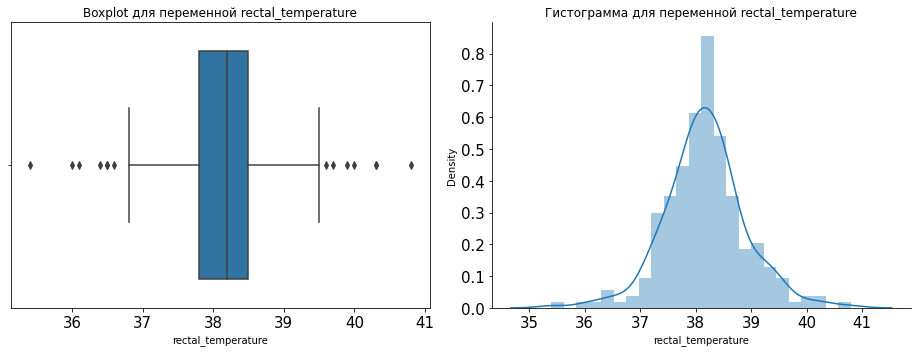

In [11]:
plot_fig(df_r, 'rectal_temperature', dens=False)

<Figure size 1152x360 with 0 Axes>

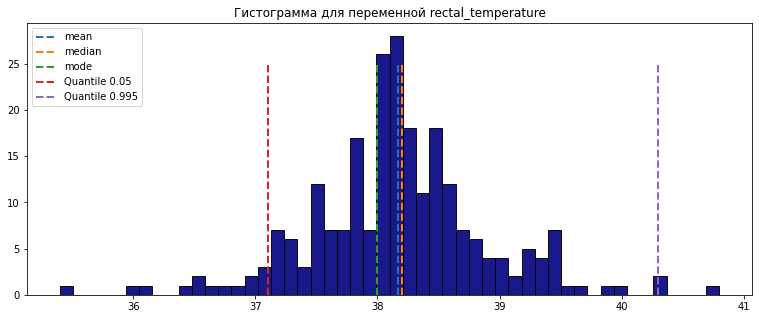

In [12]:
plt.figure(figsize = (16,5))
destrib_fig(df_r, 'rectal_temperature', dens=False, n_bins=50, l_space_stop=25)

По показателю ректальная температура имеются выбросы, как по минимальному (~ 37.1 или 0.05 квантиль) значению, так и по максимальному (~39.4 или 0.95 квантиль).

In [13]:
df_r[df_r["rectal_temperature"]<37.1]

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temp_of_extr,pain,outcome
43,1.0,1,35.4,140.0,24.0,3.0,4.0,3.0
69,2.0,1,37.0,60.0,20.0,3.0,3.0,3.0
79,1.0,1,36.4,98.0,35.0,3.0,4.0,2.0
112,1.0,1,36.8,60.0,28.0,NaN,NaN,2.0
117,1.0,1,36.5,78.0,30.0,1.0,5.0,1.0
140,2.0,1,36.0,42.0,30.0,NaN,NaN,2.0
237,2.0,1,36.1,88.0,NaN,3.0,3.0,3.0
250,2.0,1,36.6,42.0,18.0,3.0,1.0,2.0
276,2.0,1,36.9,50.0,40.0,2.0,1.0,1.0
291,1.0,1,37.0,66.0,20.0,1.0,4.0,2.0


In [14]:
df_r[df_r["rectal_temperature"]>39.4]

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temp_of_extr,pain,outcome
19,1.0,1,39.9,72.0,60.0,1.0,5.0,1.0
53,2.0,1,40.3,114.0,36.0,3.0,2.0,3.0
74,1.0,9,39.7,100.0,NaN,3.0,2.0,3.0
90,2.0,1,40.3,114.0,36.0,3.0,2.0,2.0
98,2.0,1,39.6,108.0,51.0,3.0,2.0,1.0
116,2.0,1,39.5,NaN,NaN,3.0,3.0,3.0
161,2.0,1,39.5,60.0,10.0,3.0,3.0,1.0
230,2.0,1,39.5,92.0,28.0,3.0,5.0,2.0
258,1.0,1,40.8,72.0,42.0,3.0,2.0,2.0
280,2.0,1,40.0,78.0,NaN,3.0,2.0,2.0


## 2.2. Пульс (30-40 нормально для взрослых, может иметь скорость 20-25)

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


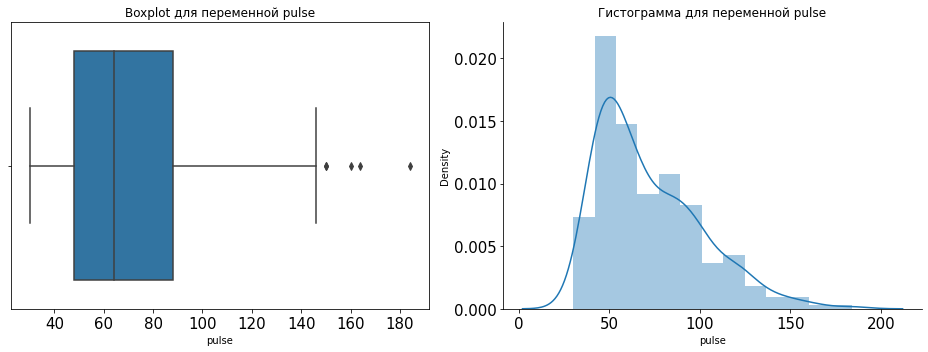

In [15]:
plot_fig(df_r, 'pulse', dens=False)

<Figure size 1152x360 with 0 Axes>

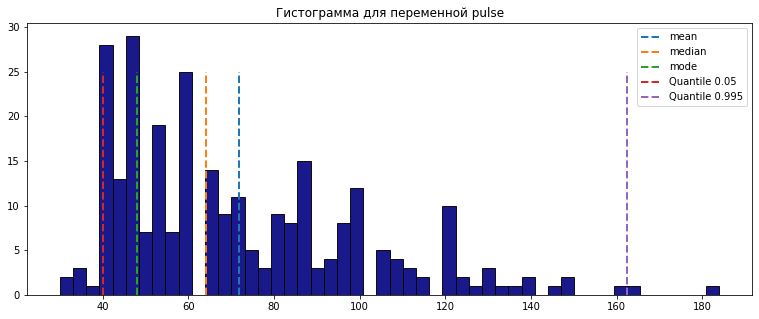

In [16]:
plt.figure(figsize = (16,5))
destrib_fig(df_r, 'pulse', dens=False, n_bins=50, l_space_stop=25)

По показателю пульс выбросы наблюдаются только по максимальному значению. При этом  животные с болезненными поражениями или страдающие циркуляторным шоком может быть учащенное сердцебиение.

## 2.3. Частота дыхания (нормальная скорость от 8 до 10)

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


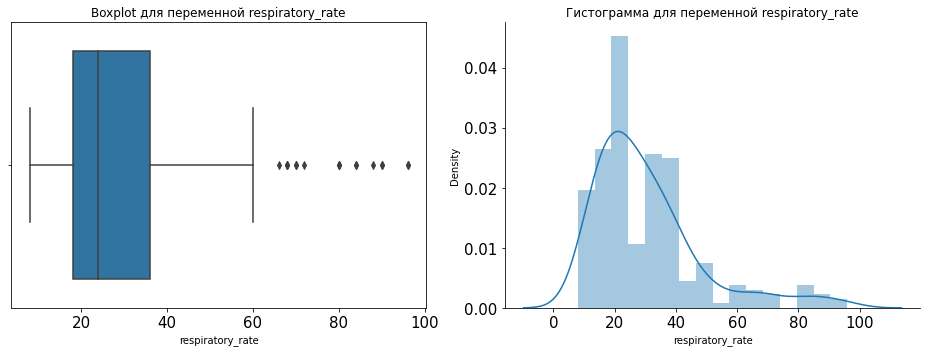

In [17]:
plot_fig(df_r, 'respiratory_rate', dens=False)

<Figure size 1152x360 with 0 Axes>

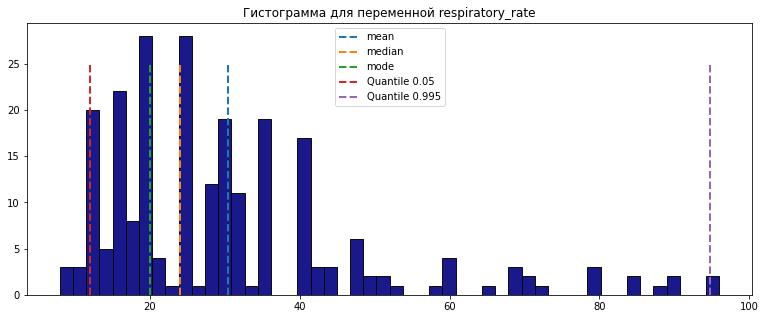

In [18]:
plt.figure(figsize = (16,5))
destrib_fig(df_r, 'respiratory_rate', dens=False, n_bins=50, l_space_stop=25)

Частота дыхания так-же имеет выбросы по максимальному значению

## 2.4. Категориальные значения

 - Хирургия
          1 = да, была операция
          2 = лечили без операции

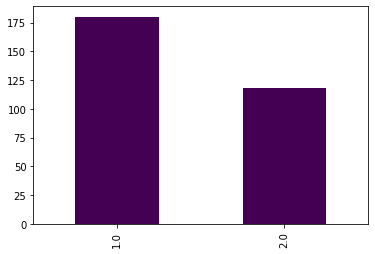

In [19]:
df_r['surgery'].value_counts().plot.bar(stacked = True, cmap="viridis")

По показателю Хирургия выбросы не обнаружены

 - Возраст
          1 = взрослая лошадь
          2 = Молодой (< 6 месяцев)

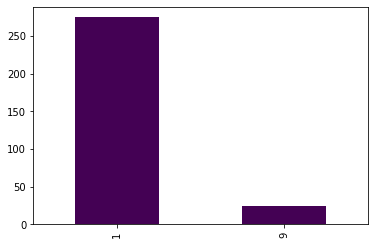

In [20]:
df_r['Age'].value_counts().plot.bar(stacked = True, cmap="viridis")

In [21]:
df_r[df_r["Age"] == 9]

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temp_of_extr,pain,outcome
2,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
8,2.0,9,38.3,90.0,NaN,1.0,5.0,1.0
12,2.0,9,38.0,92.0,28.0,1.0,1.0,2.0
15,1.0,9,NaN,128.0,36.0,3.0,4.0,2.0
22,1.0,9,38.3,130.0,60.0,NaN,2.0,1.0
38,1.0,9,39.2,146.0,96.0,NaN,NaN,2.0
40,2.0,9,39.0,150.0,72.0,NaN,NaN,1.0
54,1.0,9,38.6,160.0,20.0,3.0,3.0,2.0
73,1.0,9,NaN,NaN,NaN,NaN,NaN,2.0
74,1.0,9,39.7,100.0,NaN,3.0,2.0,3.0


In [22]:
df_r[df_r["Age"] == 2]

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temp_of_extr,pain,outcome


По показателю Возраст имеются выбросы (либо ошибка в данных) – согласно описанию столбцов показатель Возраст имеет 2 значения = 1 и 2. При этом в датафрейме отсутствуют значения 2 (предположительно 2 заменена на 9)

 - Температура конечностей. возможные значения:
               1 = нормальный
               2 = теплый
               3 = круто
               4 = холодный

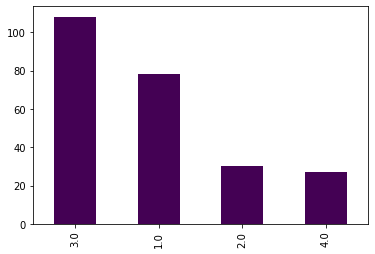

In [23]:
df_r['temp_of_extr'].value_counts().plot.bar(stacked = True, cmap="viridis")

По показателю “Температура конечностей” выбросы не обнаружены.

 - Боль - субъективная оценка уровня боли лошади. возможные значения:
               1 = тревога, боли нет
               2 = депрессия
               3 = перемежающаяся легкая боль
               4 = перемежающаяся сильная боль
               5 = постоянная сильная боль

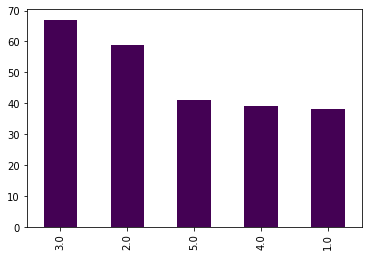

In [24]:
df_r['pain'].value_counts().plot.bar(stacked = True, cmap="viridis")

По показателю “Боль” выбросы не обнаружены.

 - Исход.что в итоге случилось с лошадью? возможные значения:
               1 = жил
               2 = умер
               3 = был усыплен

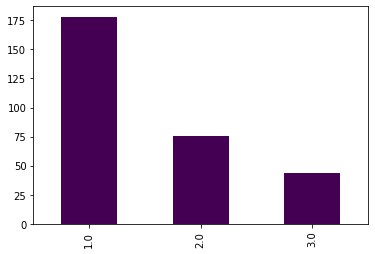

In [25]:
df_r['outcome'].value_counts().plot.bar(stacked = True, cmap="viridis")

По показателю “Исход” выбросы не обнаружены.

# Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

## 3.1. Количество пропусков

In [26]:
df_r.isnull().sum()

surgery                1
Age                    0
rectal_temperature    60
pulse                 24
respiratory_rate      58
temp_of_extr          56
pain                  55
outcome                1
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


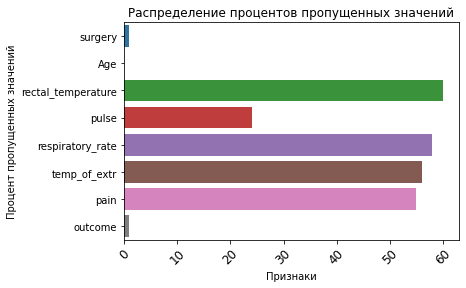

In [27]:
miss_val = pd.DataFrame((df_r.isna().sum())).reset_index()
ax = sns.barplot(0,'index', data = miss_val)
plt.xticks(rotation = 45,fontsize = 12);
plt.title("Распределение процентов пропущенных значений");
plt.ylabel("Процент пропущенных значений");
plt.xlabel("Признаки");

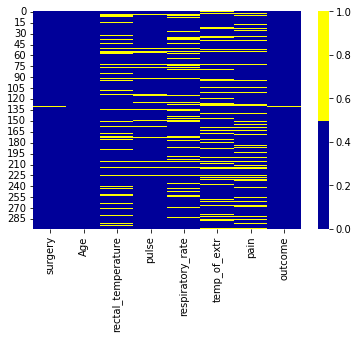

In [28]:
colors = ['#000099', '#ffff00'] # желтый - пропущенные данные, синий - не пропущенные
sns.heatmap(df_r.isnull(), cmap=sns.color_palette(colors));

## 3.2. Заполнение пропусков

Посмотрим на зависимость между показателями:

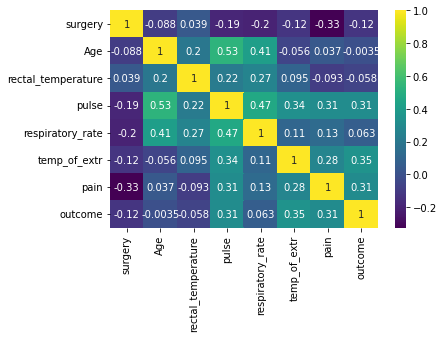

In [29]:
corr = df_r.corr()
sns.heatmap(corr, cmap="viridis", annot = True);

### 3.2.1. Хирургия и Исход

In [30]:
df_r[df_r['surgery'].isnull()]

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temp_of_extr,pain,outcome
131,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


In [31]:
df_r[df_r['outcome'].isnull()]

,surgery,Age,rectal_temperature,pulse,respiratory_rate,temp_of_extr,pain,outcome
131,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


Т.к. пустые значения по столбам хирургия и исход невозможно заполнить корректно, а пропущенные заначения имеются только у одной лошади (индекс - 131), принято решение исключить данную строку из датафрейма.

In [32]:
df_icp = df_r[~df_r['outcome'].isna()].copy()

In [33]:
df_icp.isnull().sum()

surgery                0
Age                    0
rectal_temperature    60
pulse                 24
respiratory_rate      58
temp_of_extr          56
pain                  55
outcome                0
dtype: int64

### 3.2.2. Ректальная температура

Text(0.5, 1.0, 'Зависимость ректальной температуры от пульса')

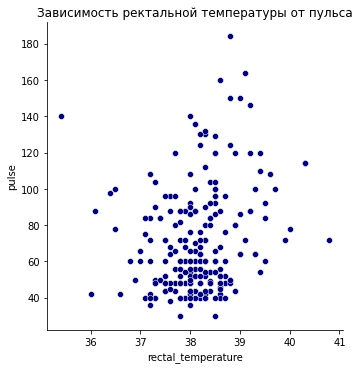

In [34]:
sns.relplot(x='rectal_temperature', y='pulse', data=df_icp, color = "navy")
plt.title("Зависимость ректальной температуры от пульса")

Text(0.5, 1.0, 'Зависимость ректальной температуры от частоты дыхания')

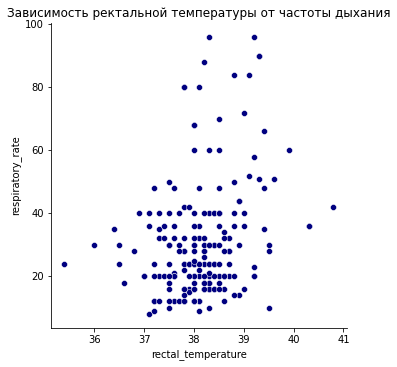

In [35]:
sns.relplot(x='rectal_temperature', y='respiratory_rate', data=df_icp, color = "navy")
plt.title("Зависимость ректальной температуры от частоты дыхания")

Какой либо существенной линейной зависимости показателя «Ректальная температура» от частоты дыхания или пульса не обнаружено

Т.к. зависимости с другими показателями не обнаружены - заполним медианой

In [36]:
df_icp['rectal_temperature'].fillna(df_icp['rectal_temperature'].median(), inplace=True)

In [37]:
df_icp.isnull().sum()

surgery                0
Age                    0
rectal_temperature     0
pulse                 24
respiratory_rate      58
temp_of_extr          56
pain                  55
outcome                0
dtype: int64

### 3.2.3. Частота дыхания

Text(0.5, 1.0, 'Зависимость частоты дыхания от пульса')

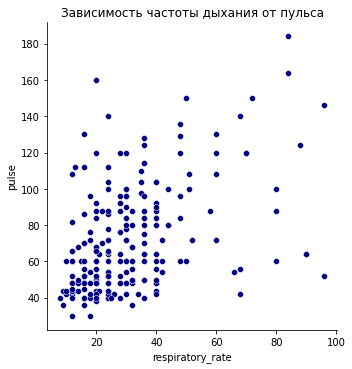

In [38]:
sns.relplot(x='respiratory_rate', y='pulse', data=df_icp, color = "navy")
plt.title("Зависимость частоты дыхания от пульса")

Наблюдается  линейная зависимость  частоты дыхания от пульса

In [39]:
df_icp['respiratory_rate'].fillna(df_icp.groupby(['pulse'])['respiratory_rate'].transform('median'), inplace=True)
df_icp.respiratory_rate.fillna(df_icp.respiratory_rate.median(),inplace=True)

In [40]:
df_icp.isnull().sum()

surgery                0
Age                    0
rectal_temperature     0
pulse                 24
respiratory_rate       0
temp_of_extr          56
pain                  55
outcome                0
dtype: int64

### 3.2.4. Температура конечностей

Температура конечнойстей зависит от ректальной температуры - чем выше ректальная температура, тем выше и температура конечностей:

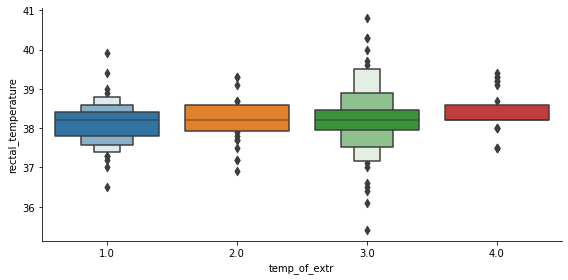

In [41]:
sns.catplot(x="temp_of_extr", y="rectal_temperature", data = df_icp, height=4, aspect=2, kind='boxen')

In [42]:
df_icp['temp_of_extr'].fillna(df_icp.groupby(['rectal_temperature'])['temp_of_extr'].transform('median'), inplace=True)
df_icp.temp_of_extr.fillna(df_icp.temp_of_extr.median(),inplace=True)

In [43]:
df_icp.isnull().sum()

surgery                0
Age                    0
rectal_temperature     0
pulse                 24
respiratory_rate       0
temp_of_extr           0
pain                  55
outcome                0
dtype: int64

### 3.2.5. Боль

Чем  лошади больнее, тем частота дыхания выше

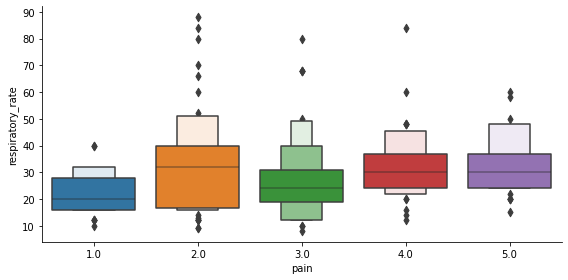

In [44]:
sns.catplot(x="pain", y="respiratory_rate", data = df_icp, height=4, aspect=2, kind='boxen')

In [45]:
df_icp['pain'].fillna(df_icp.groupby(['respiratory_rate'])['pain'].transform('median'), inplace=True)
df_icp.pain.fillna(df_icp.pain.median(),inplace=True)

In [46]:
df_icp.isnull().sum()

surgery                0
Age                    0
rectal_temperature     0
pulse                 24
respiratory_rate       0
temp_of_extr           0
pain                   0
outcome                0
dtype: int64

### 3.2.6. Пульс

Чем выше частота дыхания, тем выше пульс

Text(0.5, 1.0, 'Пульс и частота дыхания')

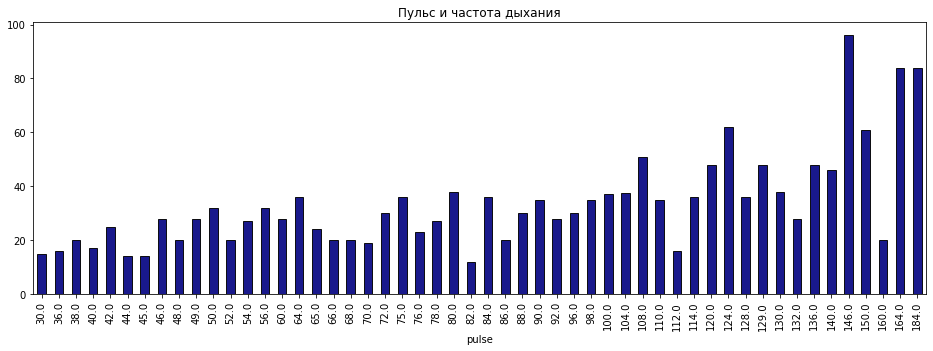

In [47]:
plt.figure(figsize = (16,5))
f=df_icp.groupby('pulse')['respiratory_rate'].median()
f.plot.bar(edgecolor='k', color = "navy", alpha=0.9)
plt.title("Пульс и частота дыхания")

In [48]:
df_icp['pulse'].fillna(df_icp.groupby('respiratory_rate')['pulse'].transform('median'), inplace=True)
df_icp.pulse.fillna(df_icp.pulse.median(),inplace=True)

In [49]:
df_icp.isnull().sum()

surgery               0
Age                   0
rectal_temperature    0
pulse                 0
respiratory_rate      0
temp_of_extr          0
pain                  0
outcome               0
dtype: int64

In [50]:
df_r.describe(include = 'all', percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,95%,99%,max
surgery,298.0,1.395973,0.489881,1.0,1.000,1.0,1.0,1.0,1.0,2.0,2.0,2.000,2.0
Age,299.0,1.642140,2.177300,1.0,1.000,1.0,1.0,1.0,1.0,1.0,9.0,9.000,9.0
rectal_temperature,239.0,38.166527,0.733508,35.4,36.214,37.1,37.3,37.8,38.2,38.5,39.4,40.186,40.8
pulse,275.0,71.934545,28.680522,30.0,36.000,40.0,42.0,48.0,64.0,88.0,125.2,152.600,184.0
respiratory_rate,241.0,30.427386,17.678256,8.0,9.400,12.0,12.0,18.0,24.0,36.0,70.0,90.000,96.0
temp_of_extr,243.0,2.345679,1.046369,1.0,1.000,1.0,1.0,1.0,3.0,3.0,4.0,4.000,4.0
pain,244.0,2.942623,1.303993,1.0,1.000,1.0,1.0,2.0,3.0,4.0,5.0,5.000,5.0
outcome,298.0,1.550336,0.737967,1.0,1.000,1.0,1.0,1.0,1.0,2.0,3.0,3.000,3.0


In [51]:
df_icp.describe(include = 'all', percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,95%,99%,max
surgery,298.0,1.395973,0.489881,1.0,1.000,1.0,1.00,1.0,1.0,2.0,2.0,2.000,2.0
Age,298.0,1.644295,2.180643,1.0,1.000,1.0,1.00,1.0,1.0,1.0,9.0,9.000,9.0
rectal_temperature,298.0,38.173826,0.656682,35.4,36.391,37.2,37.47,37.9,38.2,38.5,39.3,40.009,40.8
pulse,298.0,71.080537,27.733099,30.0,36.000,40.0,42.00,48.0,60.0,88.0,124.0,150.300,184.0
respiratory_rate,298.0,30.263423,16.155450,8.0,9.970,12.0,14.70,20.0,28.0,36.0,68.0,90.000,96.0
temp_of_extr,298.0,2.374161,1.002574,1.0,1.000,1.0,1.00,1.0,3.0,3.0,4.0,4.000,4.0
pain,298.0,2.979866,1.210753,1.0,1.000,1.0,1.00,2.0,3.0,4.0,5.0,5.000,5.0
outcome,298.0,1.550336,0.737967,1.0,1.000,1.0,1.00,1.0,1.0,2.0,3.0,3.000,3.0


После заполнения пропусков основные статистические данные изменились не значительно